In [1]:
import iris
import numpy as np
import matplotlib.pyplot as plt
import iris.plot as iplt
import cartopy.crs as ccrs
import os
os.chdir("/home/548/eh6215/Desktop/python/BARPA_evaluation/emma/lib")
from load_cmip import load_cmip
import datetime as dt

In [4]:
path = "/short/tp28/eh6215/mon_pl/"
trials = ['r4p','r6p']
years = np.arange(1980,1990)
e5_vars = ['z','u','v','q','t','w']
e5_path = "/g/data/rt52/era5/pressure-levels/monthly-averaged/{var}/{year}/{var}_era5_moda_pl_{year}{mon}01-{year}{mon}*.nc"

cp=iris.Constraint(pressure_level = lambda p: np.any([(np.abs(p.point-pp)<1) for pp in [200,500,850,1000]]))
cp500=iris.Constraint(pressure_level = lambda p: np.any([(np.abs(p.point-pp)<1) for pp in [500]]))


cy = iris.Constraint(latitude=lambda y:-55<=y<=15)
cx = iris.Constraint(longitude=lambda y: 90<=y<=210)

def callback(cube,field,filename):
    cube1 = cube.extract(iris.Constraint(longitude=lambda x: x>=0))
    cube2 = cube.extract(iris.Constraint(longitude=lambda x: x<0))
    cube2.coord('longitude').points = cube2.coord('longitude').points + 360
    if cube2.coord('longitude').has_bounds():
        cube2.coord('longitude').bounds = cube2.coord('longitude').bounds + 360
    return iris.cube.CubeList([cube1,cube2]).concatenate_cube()

In [5]:
data={}
for trial in trials:
    print(trial)
    data[trial]=iris.load([path+"*%s_%04d.nc"%(trial,year) for year in years])
    iris.util.equalise_attributes(data[trial])
    data[trial]=data[trial].concatenate()

r4p
r6p


In [6]:
e5paths = [[e5_path.format(year=year,mon="*",var=v) for v in e5_vars] for year in years]
e5paths = [item for sublist in e5paths for item in sublist]

data['era5'] = iris.load(e5paths, cp)
iris.util.equalise_attributes(data['era5'])
data['era5'] = iris.cube.CubeList([cube.regrid(data['r4p'][0],iris.analysis.Linear()) for cube in data['era5'].concatenate()])

In [36]:
varlist = {
        'lagrangian_tendency_of_air_pressure':('wap',3),
        'eastward_wind':('ua',3),
        'northward_wind':('va',3),
        'specific_humidity':('hus',3),
        'geopotential_height':('zg',3),
}

cp =iris.Constraint(air_pressure = lambda p: p in [20000,50000,85000])
cmip6 = {}
if 1:
        cmip6=iris.cube.CubeList()
        year0 =1980
        year1 =1990
        model,scen = "ACCESS-CM2","historical"
        for var in varlist:
            print(var)
            try:
                if varlist[var][1]==2:
                    cmip6.append(load_cmip(scen,model,"Amon",varlist[var][0],dt.datetime(year0,1,1),dt.datetime(year1,1,1),cx&cy,callback=callback))
                if varlist[var][1]==3:
                    cmip6.append(load_cmip(scen,model,"Amon",varlist[var][0],dt.datetime(year0,1,1),dt.datetime(year1,1,1),cx&cy&cp,callback=callback))
                cmip6[-1].rename(var)
                cmip6[-1].coord('air_pressure').convert_units('hPa')
                cmip6[-1].coord('air_pressure').rename('pressure')
            except FileNotFoundError:
                print(varlist[var])
    


lagrangian_tendency_of_air_pressure


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'wap'
  warnings.warn(


eastward_wind


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'ua'
  warnings.warn(


northward_wind


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'va'
  warnings.warn(


specific_humidity


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'hus'
  warnings.warn(


geopotential_height


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'zg'
  warnings.warn(


In [41]:
data['cmip6']=cmip6
data


{'r4p': [<iris 'Cube' of air_temperature / (K) (time: 120; pressure: 4; latitude: 459; longitude: 798)>,
 <iris 'Cube' of geopotential_height / (m) (time: 120; pressure: 4; latitude: 459; longitude: 798)>,
 <iris 'Cube' of lagrangian_tendency_of_air_pressure / (Pa s-1) (time: 120; pressure: 4; latitude: 459; longitude: 798)>,
 <iris 'Cube' of specific_humidity / (1) (time: 120; pressure: 4; latitude: 459; longitude: 798)>,
 <iris 'Cube' of x_wind / (m s-1) (time: 120; pressure: 4; latitude: 459; longitude: 798)>,
 <iris 'Cube' of y_wind / (m s-1) (time: 120; pressure: 4; latitude: 459; longitude: 798)>],
 'r6p': [<iris 'Cube' of air_temperature / (K) (time: 120; pressure: 4; latitude: 459; longitude: 798)>,
 <iris 'Cube' of geopotential_height / (m) (time: 120; pressure: 4; latitude: 459; longitude: 798)>,
 <iris 'Cube' of lagrangian_tendency_of_air_pressure / (Pa s-1) (time: 120; pressure: 4; latitude: 459; longitude: 798)>,
 <iris 'Cube' of specific_humidity / (1) (time: 120; pressur

In [38]:
data['era5']

[<iris 'Cube' of air_temperature / (K) (time: 11; pressure_level: 4; latitude: 459; longitude: 798)>,
<iris 'Cube' of eastward_wind / (m s**-1) (time: 11; pressure_level: 4; latitude: 459; longitude: 798)>,
<iris 'Cube' of geopotential / (m**2 s**-2) (time: 11; pressure_level: 4; latitude: 459; longitude: 798)>,
<iris 'Cube' of lagrangian_tendency_of_air_pressure / (Pa s**-1) (time: 11; pressure_level: 4; latitude: 459; longitude: 798)>,
<iris 'Cube' of northward_wind / (m s**-1) (time: 11; pressure_level: 4; latitude: 459; longitude: 798)>,
<iris 'Cube' of specific_humidity / (kg kg**-1) (time: 11; pressure_level: 4; latitude: 459; longitude: 798)>]

In [42]:
varlist=[('Vertical Wind',["lagrangian_tendency_of_air_pressure"],500,-0.15,0.15,.075,'BrBG_r','PuOr_r'),
      ('Specific humidity',["specific_humidity"], 850,0,0.015,0.002,'viridis','BrBG'),
      ("Geopotential height",["geopotential_height",'geopotential'],850,1200,1600,20,'viridis','PuOr_r'),
      ("Geopotential height",["geopotential_height",'geopotential'],200,11000,12500,30,'viridis','PuOr_r'),
      ("Zonal wind",["x_wind","eastward_wind"],850,-12,12,4,'PiYG','PRGn'),
       ("Zonal wind",["x_wind","eastward_wind"],200,-50,50,5,'PiYG','PRGn')]

In [49]:
from scipy.stats import ttest_rel
sig = {}

for i,(title,names,height,vmin,vmax,vdiff,cmap1,cmap2) in enumerate(varlist):
    print(title)
    tmp1 = data['r4p'].extract(names).extract(iris.Constraint(pressure = height)).concatenate_cube()#.collapsed('time',iris.analysis.MEAN)
    tmp2 = data['r6p'].extract(names).extract(iris.Constraint(pressure = height)).concatenate_cube()#.collapsed('time',iris.analysis.MEAN)
    sig["%s%d"%(title,height)]=tmp1[0].copy(data=ttest_rel(tmp1.data,tmp2.data,axis=0).pvalue)

Vertical Wind
Specific humidity
Geopotential height
Geopotential height
Zonal wind
Zonal wind


['lagrangian_tendency_of_air_pressure']


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:

['specific_humidity']


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:

['geopotential_height', 'geopotential']


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:

['geopotential_height', 'geopotential']


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:

['x_wind', 'eastward_wind']


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:

['x_wind', 'eastward_wind']


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:

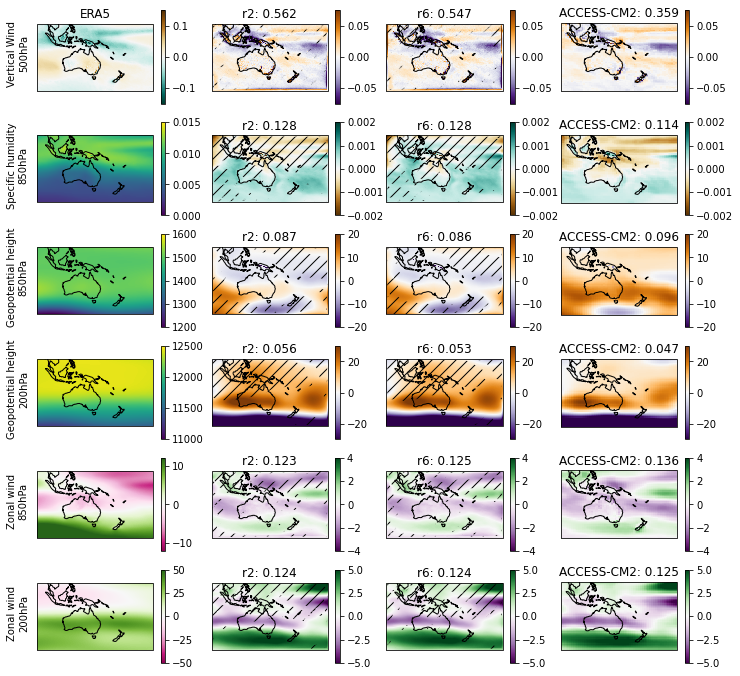

In [50]:
fig = plt.figure(figsize=(12,12))
for i,(title,names,height,vmin,vmax,vdiff,cmap1,cmap2) in enumerate(varlist):
    for j,trial in enumerate(['era5','r4p','r6p','cmip6']):
        if trial == 'era5':
            print(names)
            ax=plt.subplot(6,4,i*4+j+1,projection=ccrs.PlateCarree(180))
            e5 = data[trial].extract(names)[0].extract(iris.Constraint(pressure_level = height)).collapsed('time',iris.analysis.MEAN)
            if title == 'Geopotential height':
                e5 = e5/9.8
                e5.units='m'
            iplt.pcolormesh(e5,cmap=cmap1,vmin=vmin,vmax=vmax)
            plt.colorbar()
            ax.coastlines()
            plt.xlim(e5.coord('longitude').points[0]-180,e5.coord('longitude').points[-1]-180)
            plt.ylim(e5.coord('latitude').points[0],e5.coord('latitude').points[-1])
            ax.text(-0.07, 0.55, title+"\n%dhPa"%height, va='bottom', ha='center',
                rotation='vertical', rotation_mode='anchor',
                transform=ax.transAxes)
            if i==0:
                plt.title("ERA5")
        else:
            ax=plt.subplot(6,4,i*4+j+1,projection=ccrs.PlateCarree(180))
            tmp = data[trial].extract(names).extract(iris.Constraint(pressure = height)).concatenate_cube().collapsed('time',iris.analysis.MEAN)
            
            if trial=='cmip6':
                e5 = e5.regrid(tmp,iris.analysis.Linear())
            iplt.pcolormesh(tmp-e5,vmin=-vdiff,vmax=vdiff,cmap=cmap2)      
            plt.colorbar()
            plt.title("%s: %0.3f"%(['era5','r2','r6','ACCESS-CM2'][j],np.sqrt((tmp-e5).data**2).mean()/e5.data.std()) )
            if trial in ['r4p','r6p']:
                iplt.contourf(sig["%s%d"%(title,height)],(0,0.05),hatches=['//'],colors='None')
                
            ax.coastlines()
            plt.xlim(e5.coord('longitude').points[0]-180,e5.coord('longitude').points[-1]-180)
            plt.ylim(e5.coord('latitude').points[0],e5.coord('latitude').points[-1])
            

In [40]:
data

{'r4p': [<iris 'Cube' of air_temperature / (K) (time: 120; pressure: 4; latitude: 459; longitude: 798)>,
 <iris 'Cube' of geopotential_height / (m) (time: 120; pressure: 4; latitude: 459; longitude: 798)>,
 <iris 'Cube' of lagrangian_tendency_of_air_pressure / (Pa s-1) (time: 120; pressure: 4; latitude: 459; longitude: 798)>,
 <iris 'Cube' of specific_humidity / (1) (time: 120; pressure: 4; latitude: 459; longitude: 798)>,
 <iris 'Cube' of x_wind / (m s-1) (time: 120; pressure: 4; latitude: 459; longitude: 798)>,
 <iris 'Cube' of y_wind / (m s-1) (time: 120; pressure: 4; latitude: 459; longitude: 798)>],
 'r6p': [<iris 'Cube' of air_temperature / (K) (time: 120; pressure: 4; latitude: 459; longitude: 798)>,
 <iris 'Cube' of geopotential_height / (m) (time: 120; pressure: 4; latitude: 459; longitude: 798)>,
 <iris 'Cube' of lagrangian_tendency_of_air_pressure / (Pa s-1) (time: 120; pressure: 4; latitude: 459; longitude: 798)>,
 <iris 'Cube' of specific_humidity / (1) (time: 120; pressur

In [33]:
tmp = data[trial].extract(names)

In [35]:
tmp.coord('pressure')

AttributeError: 'CubeList' object has no attribute 'coord'